In [1]:
import pandas as pd
from Bio import SeqIO
import numpy as np

df = pd.read_csv('k.csv')



In [2]:
def size_getter(km,a):
    return len(km[a])



In [3]:
df_liver = pd.read_csv('liver_enh_to_gene_peakachuloop-linked.tsv', sep='\t')
s = df_liver.groupby('target_gene').size().reset_index()
s =s.sort_values(by=[0],ascending=False)

record = SeqIO.parse("test.fa.out", "fasta")
record_dict = SeqIO.to_dict(SeqIO.parse('test.fa.out', 'fasta'))
records = list(record)
pd_bed = pd.DataFrame.from_records([record_dict])
pd_bed  = pd_bed.transpose().reset_index()

p = s.merge(df_liver,left_on=['target_gene'],right_on=['target_gene'])
p['startEnd'] = p.apply(lambda row: row.enh_chrom +":" +str(row.enh_start)+"-"+str(row.enh_end), axis=1)
p = p.merge(pd_bed,left_on=['startEnd'],right_on=['index'])
p= p.rename(columns={'0_y': "lister"})
p = p[['startEnd', 'lister','target_gene']]
k= p.groupby('target_gene')['lister'].agg(list)
k = k.reset_index()





In [4]:
k

,target_gene,lister
0,ENSG00000000460,"[(A, G, C, C, A, G, A, G, A, G, G, C, C, T, C,..."
1,ENSG00000000938,"[(A, C, T, G, T, C, A, G, T, G, T, T, C, C, T,..."
2,ENSG00000000971,"[(G, A, T, T, G, T, A, C, A, T, G, A, A, A, G,..."
3,ENSG00000001084,"[(C, A, G, A, G, C, A, T, A, A, G, G, A, T, G,..."
4,ENSG00000001167,"[(a, t, g, c, t, t, t, a, t, a, c, a, t, g, t,..."
...,...,...
7477,ENSG00000272573,"[(g, t, g, t, g, a, a, c, a, c, a, a, c, t, c,..."
7478,ENSG00000272617,"[(g, t, a, t, t, t, t, t, t, g, t, a, g, a, g,..."
7479,ENSG00000272772,"[(G, C, C, A, A, A, C, A, C, C, C, T, T, T, A,..."
7480,ENSG00000272822,"[(g, c, c, a, g, t, g, a, g, a, a, a, a, g, a,..."


In [9]:
read = []

In [32]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

def globalAlign(a,b):
    a =  a.seq
    b =  b.seq
    for k in pairwise2.align.globalms(a, b,2, -1, -.5, -.1):
        al1,al2, score, begin, end = k
    return score

def globalValue(df):
#     print(df)
    length = len(df.lister)
    sequences = df['lister']
    b = np.zeros(shape=(length,length))
    name  = str(df.target_gene)
    for i in range(0,length-1):
        for j in range(0,length-1):
            if(b[j][i] != 0):
                b[i][j] = b[j][i]
            else:
#                 print(sequences[i],sequences[j])
                b[i][j] = globalAlign(sequences[i],sequences[j])
    read.append(b)
    return b



In [6]:
k['size'] = k.apply(size_getter,args=('lister',),axis=1)

In [44]:
b = k[k['size'] == 10]

In [35]:
b = b[b['size'] > 1]

In [36]:
len(b)

2246

In [71]:
read.clear()

In [72]:
for i in range(100):
    globalValue(b.iloc[i])

In [46]:
b.iloc[1]

target_gene                                      ENSG00000014138
lister         [(t, g, a, c, a, g, c, a, a, a, c, c, a, c, a,...
size                                                          10
Name: 130, dtype: object

In [7]:
b = k[k['target_gene'] == 'ENSG00000102904']

In [30]:
b

,target_gene,lister,size
1124,ENSG00000102904,"[(A, T, G, A, G, G, A, C, G, T, G, C, A, G, A,...",268


In [47]:
globalMatrix = globalValue(b.iloc[1])

In [33]:
globalMatrix = globalValue(k.iloc[1124])

KeyboardInterrupt: 

In [48]:
globalMatrix

array([[ 708. ,  248.1,   74.6,  398.6,  189. ,  -72.4,  -66.5,  -65.9,
         -61.8,    0. ],
       [ 248.1,  722. ,  264.1,  420.7,  223.9,  189.7,  179.4,  193.8,
         162.3,    0. ],
       [  74.6,  264.1,  472. ,  317.4,  231.6,  239. ,  219.7,  210.9,
         204.6,    0. ],
       [ 398.6,  420.7,  317.4, 2504. ,  448.8,  424. ,  351.3,  347.7,
         290. ,    0. ],
       [ 189. ,  223.9,  231.6,  448.8,  620. ,  222.2,  199.9,  206.7,
         192.6,    0. ],
       [ -72.4,  189.7,  239. ,  424. ,  222.2,  724. ,  344.1,  323.5,
         308.6,    0. ],
       [ -66.5,  179.4,  219.7,  351.3,  199.9,  344.1,  606. ,  313. ,
         284.7,    0. ],
       [ -65.9,  193.8,  210.9,  347.7,  206.7,  323.5,  313. ,  594. ,
         271.1,    0. ],
       [ -61.8,  162.3,  204.6,  290. ,  192.6,  308.6,  284.7,  271.1,
         512. ,    0. ],
       [   0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
           0. ,    0. ]])

In [12]:
from scipy.cluster import hierarchy

In [13]:
import matplotlib.pyplot as plt

In [18]:
read[0]

array([[0.]])

In [49]:
clusters = hierarchy.linkage(globalMatrix, method="complete")
labelList = range(0, len(globalMatrix))


In [40]:
labelList

range(0, 10)

In [40]:
def plot_dendrogram(clusters):
    plt.figure(figsize=(20,6))
    dendrogram = hierarchy.dendrogram(clusters, labels=labelList, orientation="top",leaf_font_size=9, leaf_rotation=360)
    plt.ylabel('Distance');

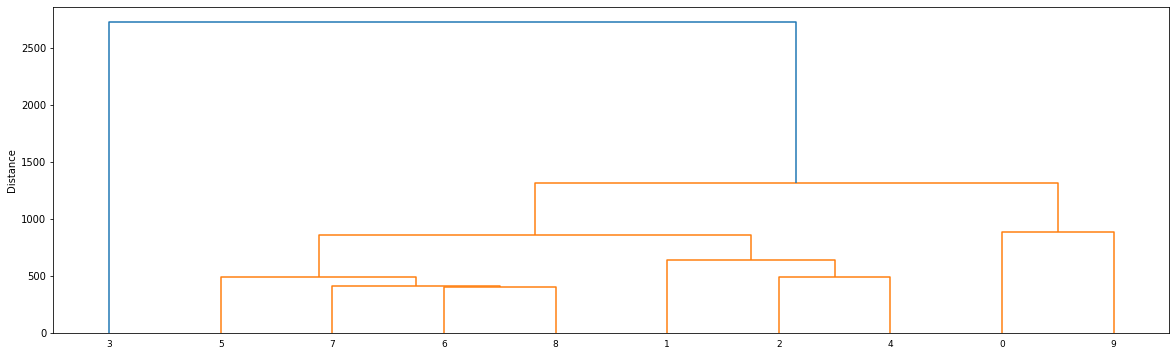

In [50]:
plot_dendrogram(clusters)